In [1]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import max_norm
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
import keras
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.applications  import DenseNet121
from tensorflow.keras import layers

In [3]:
# Imports
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)

In [5]:
train_generator = train_datagen.flow_from_directory(
    './Dataset2',
    target_size=(224, 224),
    batch_size=32,subset='training'
  )


Found 69716 images belonging to 39 classes.


In [6]:
test_generator = train_datagen.flow_from_directory(
     './Dataset2',
    target_size=(224, 224),
    batch_size=32,subset='validation'
  )

Found 29864 images belonging to 39 classes.


In [7]:
import os
import tensorflow as tf

def load_and_preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = img / 255.0  # Normalize to [0,1]
    return img, label

In [8]:
# Directory with your dataset
dataset_dir = './Dataset2'

In [9]:
# Create a mapping between class names and integer labels
class_to_label = {class_name: i for i, class_name in enumerate(os.listdir(dataset_dir))}

# List files and labels
file_paths = []
labels = []

for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        class_label = class_to_label[class_name]
        for filename in os.listdir(class_dir):
            file_path = os.path.join(class_dir, filename)
            file_paths.append(file_path)
            labels.append(class_label)

# Create a dataset using tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
dataset = dataset.map(load_and_preprocess_image)

# Shuffle and batch the dataset
batch_size = 32
dataset = dataset.shuffle(buffer_size=len(file_paths)).batch(batch_size)

# Visualize the dataset
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

plt.show()


ResourceExhaustedError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[1,224,224,3] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node resize/ResizeBilinear}}]] [Op:IteratorGetNext] name: 

<Figure size 1000x1000 with 0 Axes>

In [54]:
dataset_dir = "./Dataset2"

for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    
    # Check if the entry in the directory is a directory
    if os.path.isdir(class_dir):
        try:
            class_label = int(class_name)  # Assuming class names are integer labels
            for filename in os.listdir(class_dir):
                file_path = os.path.join(class_dir, filename)
                # Continue with your processing
        except ValueError:
            print(f"Skipping class {class_name}: Not a valid integer label.")


Skipping class ا: Not a valid integer label.
Skipping class ب: Not a valid integer label.
Skipping class ت: Not a valid integer label.
Skipping class ث: Not a valid integer label.
Skipping class ج: Not a valid integer label.
Skipping class ح: Not a valid integer label.
Skipping class خ: Not a valid integer label.
Skipping class د: Not a valid integer label.
Skipping class ذ: Not a valid integer label.
Skipping class ر: Not a valid integer label.
Skipping class ز: Not a valid integer label.
Skipping class س: Not a valid integer label.
Skipping class ش: Not a valid integer label.
Skipping class ص: Not a valid integer label.
Skipping class ض: Not a valid integer label.
Skipping class ط: Not a valid integer label.
Skipping class ظ: Not a valid integer label.
Skipping class ع: Not a valid integer label.
Skipping class غ: Not a valid integer label.
Skipping class ف: Not a valid integer label.
Skipping class ق: Not a valid integer label.
Skipping class ك: Not a valid integer label.
Skipping c

In [55]:
#call Dense model
dense_model = DenseNet121(include_top=True , weights='imagenet')
for models in dense_model.layers:
    models.trainable= False

In [56]:
#removing the last 2 alyer to get rid of output layer in DenseNet121
dense_model = keras.Model(inputs=dense_model.input, outputs=dense_model.layers[-2].output)
model = tf.keras.Sequential()
# for layer in dense_model.layers:
model.add(dense_model)
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(39, activation='softmax'))

In [57]:
model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True, monitor='val_loss', mode='min')


In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 1024)              7037504   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 39)                39975     
                                                                 
Total params: 7077479 (27.00 MB)
Trainable params: 39975 (156.15 KB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [45]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early,checkpoint],
    epochs = 20)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 737, in start

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\user\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\user\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\user\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in process_one

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 758, in execute_request

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 426, in do_execute

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\user\AppData\Local\Temp\ipykernel_5964\2687215276.py", line 1, in <module>

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy

  File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,39] labels_size=[32,33]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_56746]

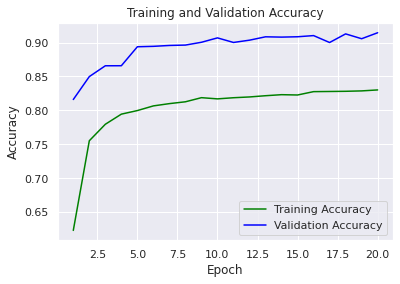

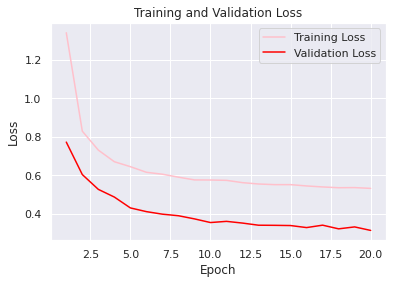

In [15]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:

#predict test data
y = model.predict(test_generator)
y =  np.argmax(y,axis= 1 )




29016

In [41]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])
i = 0
for data, labels in test_generator:
    i += 1
    y = np.argmax(model.predict(data), axis=1)
    y_true = np.append(y_true, labels)
    y_pred = np.append(y_pred, y)
    
    if i == test_generator.samples // 32 + 1:
        break


In [79]:
model.evaluate(test_generator)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


907/907 [==============================] - 364s 401ms/step - loss: 0.3169 - accuracy: 0.9159


[0.3169253468513489, 0.9158740043640137]

In [102]:
class_names = {}
l = list(test_generator.class_indices.keys())
for i in range(len(l)) :
    class_names[i] = l[i]

[1]
ب


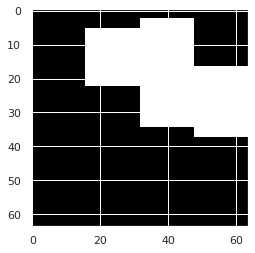

In [114]:
#example 1
from keras.preprocessing import image
import numpy as np
image_path = "../input/arabic-letters-numbers-ocr/Dataset/ا/1023.png"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

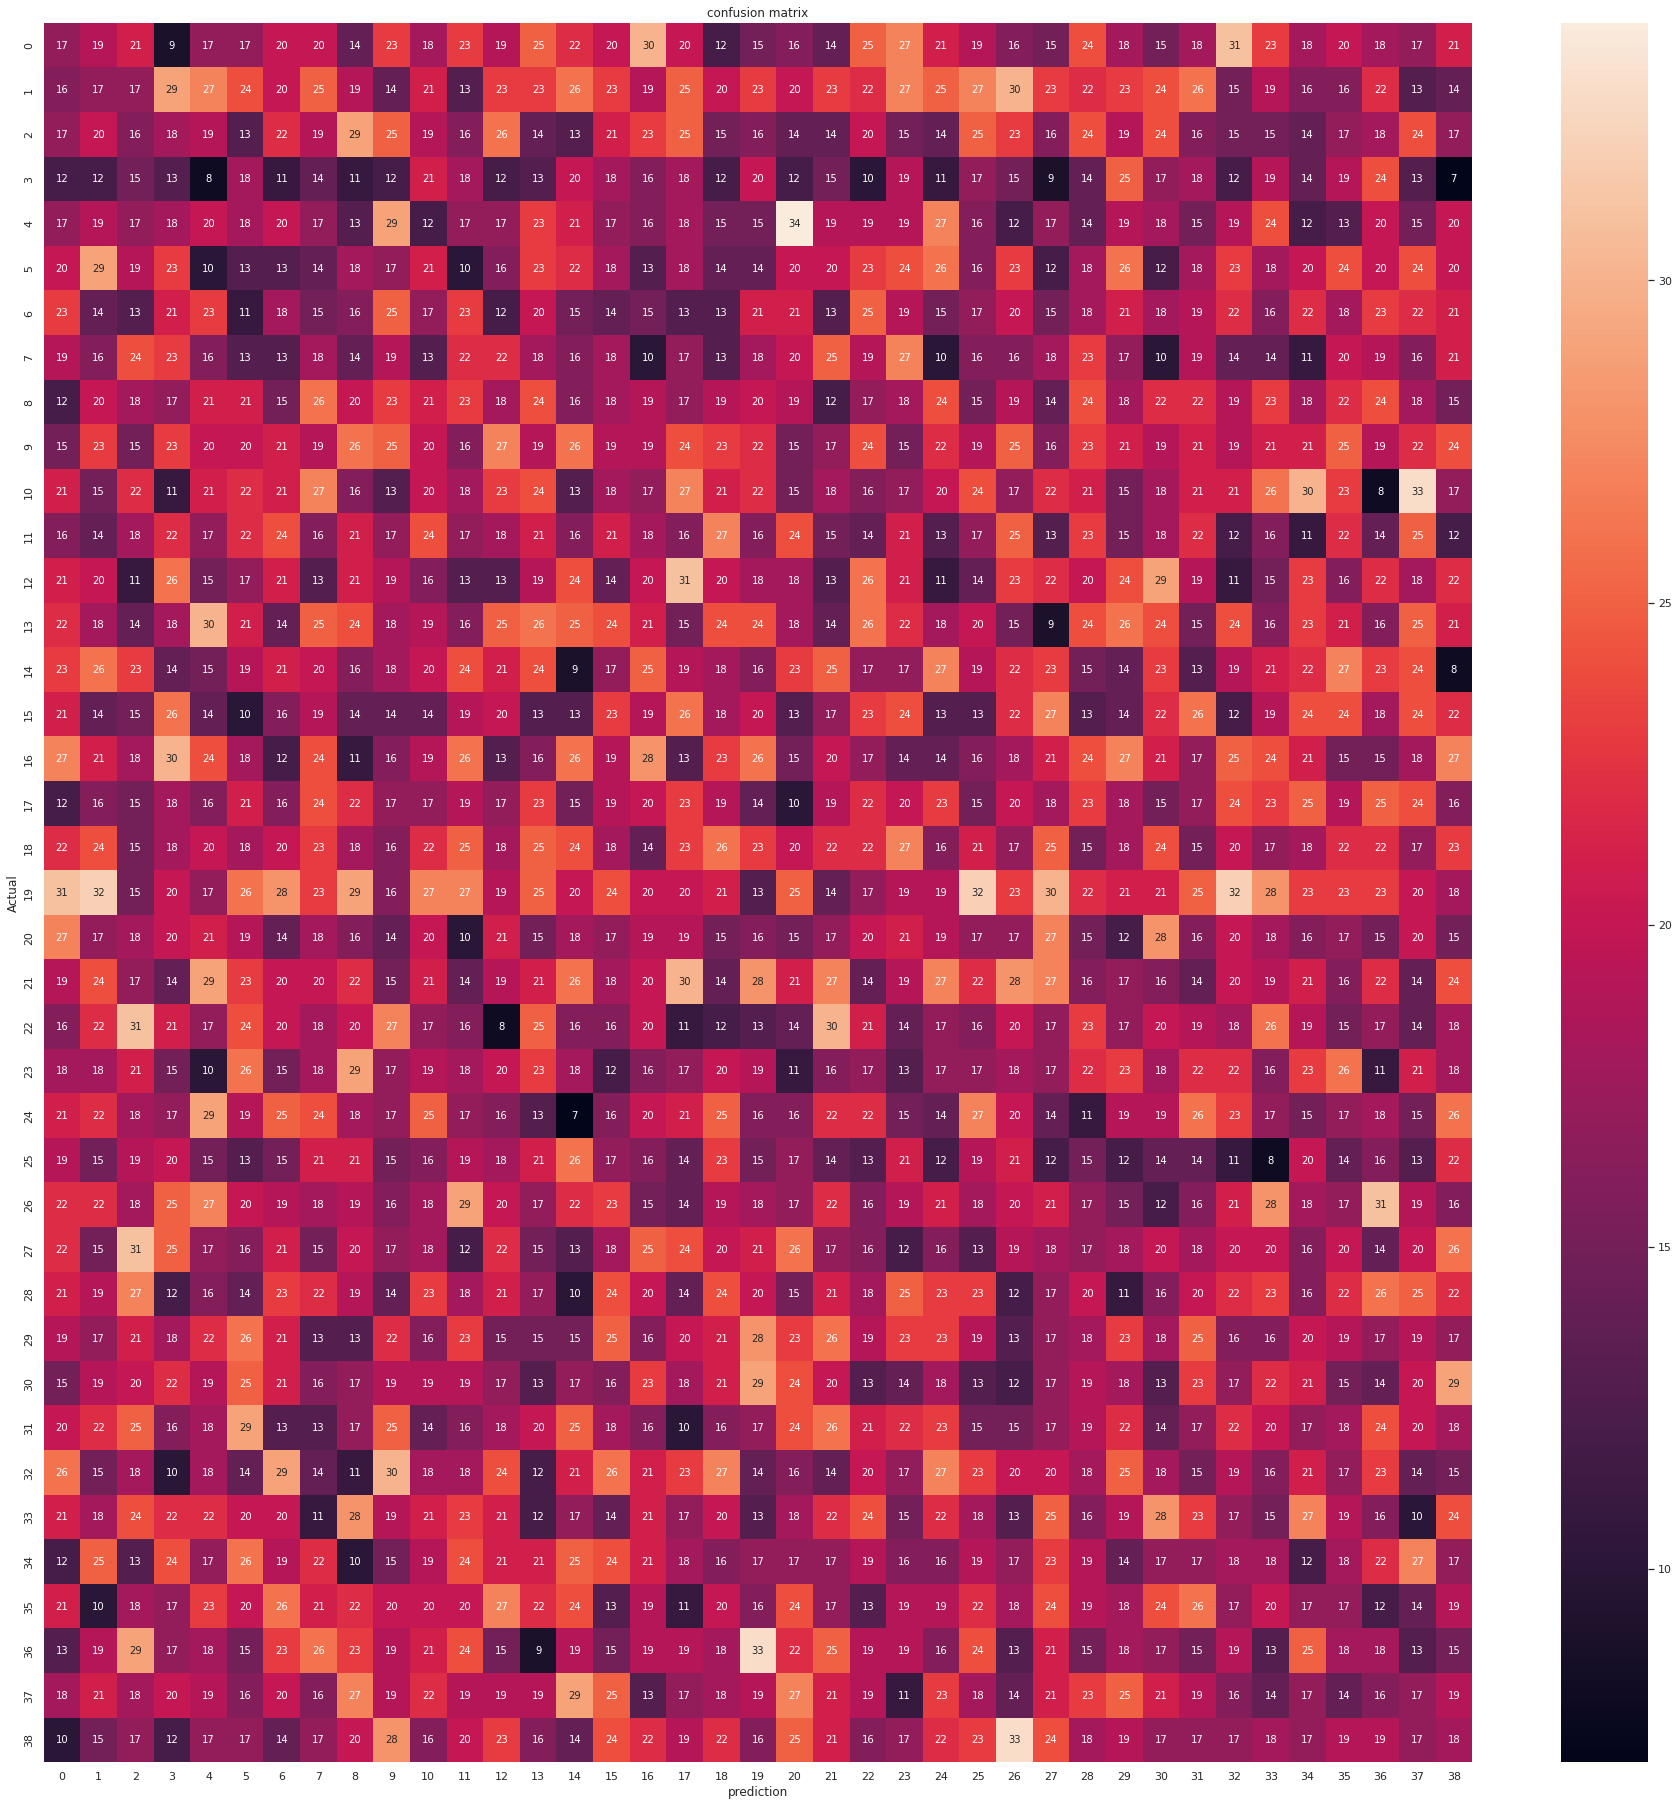

In [88]:
cm  = confusion_matrix(y_pred,y_true)
plt.figure(figsize=(32,32))
df_cm = pd.DataFrame(cm, index = [i for i in range(39)],
                  columns = [i for i in range(39)])
seaborn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');
plt.show()
